# 1. Getting VizDoom Up and Running

In [2]:
# Import vizdoom for game env
from vizdoom import *
# Import random for action sampling
import random
# Import time for sleeping
import time
# Import numpy for identity matrix
import numpy as np

In [3]:
# Setup game
game = DoomGame()
game.load_config('GitHub/VizDoom/scenarios/basic.cfg')
game.init()

In [4]:
# This is the set of actions we can take in the environment
actions = np.identity(3, dtype = np.uint8)

In [5]:
random.choice(actions)

array([1, 0, 0], dtype=uint8)

In [6]:
game.get_state().screen_buffer.shape

(3, 240, 320)

In [7]:
# Loop through episodes
episodes = 10
for episode in range(episodes):
    # Create a new episode or a game
    game.new_episode()
    # Check the game isn't done
    while not game.is_episode_finished():
        # Get the game state
        state = game.get_state()
        # Get the game image
        img = state.screen_buffer
        # Get the game variables - ammo
        info = state.game_variables
        # Take an action
        reward = game.make_action(random.choice(actions), 4)
        # Print reward
        print('reward: ', reward)
        time.sleep(0.02)
    print('Result: ', game.get_total_reward())
    time.sleep(2)
game.close()

reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward

# 2. Converting it to a Gym Environment

In [8]:
# Import environment base class from OpenAI Gym
from gym import Env
# Import gym spaces
from gym.spaces import Discrete, Box
# Import opencv
import cv2

In [9]:
Box(low = 0, high = 255, shape = (320, 240), dtype = np.uint8).sample()

array([[175,  30, 218, ...,  77, 236, 117],
       [242,  34, 238, ..., 244,  78, 191],
       [ 22,  20,  61, ..., 213,  65, 114],
       ...,
       [196, 210, 150, ..., 196, 153,  64],
       [100,  66,   4, ..., 122, 173, 197],
       [ 86, 106,  30, ..., 186, 189, 174]], dtype=uint8)

In [10]:
Discrete(3).sample()

1

In [11]:
actions[Discrete(3).sample()]

array([1, 0, 0], dtype=uint8)

In [12]:
# Create VizDoom OpenAI Gym Environment
class VizDoomGym(Env):
    # Function that is called when we start the env
    def __init__(self, render = False):
        # Inherit from Env
        super().__init__()
        # Setup the game
        self.game = DoomGame()
        self.game.load_config('GitHub/VizDoom/scenarios/basic.cfg')

        # Render frame logic
        if render == False:
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
        
        # Start the game
        self.game.init()

        # Create the observation space and the action space
        self.observation_space = Box(low = 0, high = 255, shape = (100, 160, 1), dtype = np.uint8)
        self.action_space = Discrete(3)

    # This is how we take a step in the environment
    def step(self, action):
        # Specify action and take step
        actions = np.identity(3, dtype = np.uint8)
        reward = self.game.make_action(actions[action], 4)

        # Get all the other stuff we need to return
        if self.game.get_state():
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            ammo = self.game.get_state().game_variables[0]
            info = ammo
        else:
            state = np.zeros(self.observation_space.shape)
            info = 0

        info = {"info":info}
        done = self.game.is_episode_finished()

        return state, reward, done, info
    
    # Define how to render the game or environment
    def render():
        pass
    # What happens when we start a new game
    def reset(self):
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    
    # Grayscale the game frame and resize it
    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160, 100), interpolation = cv2.INTER_CUBIC)
        state = np.reshape(resize, (100, 160, 1))
        return state
    
    # Call to close down the game
    def close(self):
        self.game.close()

In [22]:
env = VizDoomGym(render = True)

In [23]:
env.observation_space.sample().shape

(100, 160, 1)

In [24]:
state = env.reset()

In [25]:
state.shape

(100, 160, 1)

In [26]:
state

array([[[55],
        [50],
        [59],
        ...,
        [57],
        [57],
        [66]],

       [[68],
        [65],
        [65],
        ...,
        [56],
        [67],
        [72]],

       [[49],
        [79],
        [66],
        ...,
        [79],
        [51],
        [29]],

       ...,

       [[75],
        [63],
        [62],
        ...,
        [44],
        [71],
        [60]],

       [[15],
        [48],
        [47],
        ...,
        [49],
        [69],
        [47]],

       [[22],
        [14],
        [26],
        ...,
        [57],
        [37],
        [39]]], dtype=uint8)

In [27]:
env.step(2)

(array([[[55],
         [50],
         [59],
         ...,
         [57],
         [57],
         [66]],
 
        [[68],
         [65],
         [65],
         ...,
         [56],
         [67],
         [72]],
 
        [[49],
         [79],
         [66],
         ...,
         [79],
         [51],
         [29]],
 
        ...,
 
        [[75],
         [63],
         [62],
         ...,
         [44],
         [71],
         [60]],
 
        [[15],
         [48],
         [47],
         ...,
         [49],
         [69],
         [47]],
 
        [[22],
         [14],
         [26],
         ...,
         [57],
         [37],
         [39]]], dtype=uint8),
 -4.0,
 False,
 {'info': 50.0})

In [28]:
env_checker.check_env(env)

In [29]:
env.close()

In [30]:
# Import Environment checker
from stable_baselines3.common import env_checker

# 3. View Game State

In [31]:
# Import matplotlib for visualization
from matplotlib import pyplot as plt

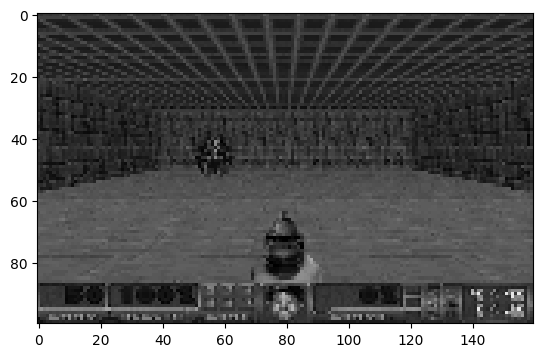

In [32]:
plt.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))

# 4. Train Model

In [33]:
# Import PPO for training
from stable_baselines3 import PPO

In [34]:
LOG_DIR = './logs/log_basic'

In [35]:
# Non rendered environment
env = VizDoomGym()

In [36]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose = 1, tensorboard_log = LOG_DIR, learning_rate = 0.0001, n_steps = 2048)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [37]:
# Train the AI model, this is where the AI model starts to Learn
model.learn(total_timesteps = 100000)

Logging to ./logs/log_basic\PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.8     |
|    ep_rew_mean     | -61.3    |
| time/              |          |
|    fps             | 17       |
|    iterations      | 1        |
|    time_elapsed    | 120      |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 24.4        |
|    ep_rew_mean          | -36.2       |
| time/                   |             |
|    fps                  | 20          |
|    iterations           | 2           |
|    time_elapsed         | 199         |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008099595 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -8.08e-05 

In [39]:
model.save('./Train/train_basic')

# 5. Test the Model

In [41]:
# Import eval policy to test agent
from stable_baselines3.common.evaluation import evaluate_policy

In [42]:
# Reload model from disc
model = PPO.load('./Train/train_basic', env = env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [54]:
# Create rendered environment
env = VizDoomGym(render = True)

In [55]:
# Evaluate mean reward for 10 games
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes = 100)

In [56]:
mean_reward

87.68

In [57]:
for episode in range(5):
    obs = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        time.sleep(0.20)
        total_reward += reward
    print('Total Reward for episode {} is {}'.format(episode, total_reward))
    time.sleep(2)
env.close()

Total Reward for episode 0 is 79.0
Total Reward for episode 1 is 95.0
Total Reward for episode 2 is 95.0
Total Reward for episode 3 is 95.0
Total Reward for episode 4 is 41.0
